<a href="https://colab.research.google.com/github/vihaankrishna100/AI_ML_DeepLearning-Projects/blob/main/Final_InterestRateRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/IR3TIB01USM156N (1).csv")

In [ ]:
df.head()
df.rename(columns={'IR3TIB01USM156N':'Rates'}, inplace=True)
df.head()

,observation_date,Rates
0,1980-06-01,8.49
1,1980-07-01,8.65
2,1980-08-01,9.91
3,1980-09-01,11.29
4,1980-10-01,12.94


In [ ]:
ir = df[['Rates']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

ir_scaled = scaler.fit_transform(ir)
len(df)

427

In [ ]:
ir_training_features = []
ir_training_labels = []
for i in range(20, len(ir_scaled)):
  ir_training_features.append(ir_scaled[i-20:i, 0])
  ir_training_labels.append(ir_scaled[i, 0])

In [ ]:
x_train = np.array(ir_training_features)
y_train = np.array(ir_training_labels)

print(x_train.shape)
print(y_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


(407, 20)
(407,)


In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model

# Defining the LSTM network
input_layer = Input(shape=(x_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)

lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)

lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)

lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)

# Creating and compiling the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 20, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 20, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 20, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 20, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 20, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 20, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(x_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,1)

print(y_train.shape)

model_history = model.fit(x_train, y_train, epochs=25, verbose=1, batch_size=32)

(407, 20, 1)
(407,)
(407, 1)
Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0613
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0151
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0084
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0080
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0067
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0066
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0065
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0049
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0043
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0037
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0037
Epoch 12/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0045
Epoch 13/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0039
Epoch 14/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0040
Epoch 15/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
df_test = pd.read_csv("/content/IR3TIB01USM156N (2).csv")
df_test.rename(columns={'IR3TIB01USM156N':'Rates'}, inplace=True)
df_test.head()


,observation_date,Rates
0,2015-12-01,0.54
1,2016-01-01,0.57
2,2016-02-01,0.54
3,2016-03-01,0.55
4,2016-04-01,0.55


In [ ]:
ir_test_processed = df_test[['Rates']].values

ir_all = pd.concat((df['Rates'], df_test['Rates']), axis=0)

test_inputs = ir_all[len(ir_all) - len(df_test) - 20:].values
print(test_inputs.shape)

(129,)


In [ ]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

ir_test_features = []
for i in range(20,129):
  ir_test_features.append(test_inputs[i-20:i, 0])

(129, 1)


In [ ]:
x_test = np.array(ir_test_features)
print(x_test.shape)

x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(109, 20)
(109, 20, 1)


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)

y_pred = scaler.inverse_transform(y_pred)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step
(109, 1)


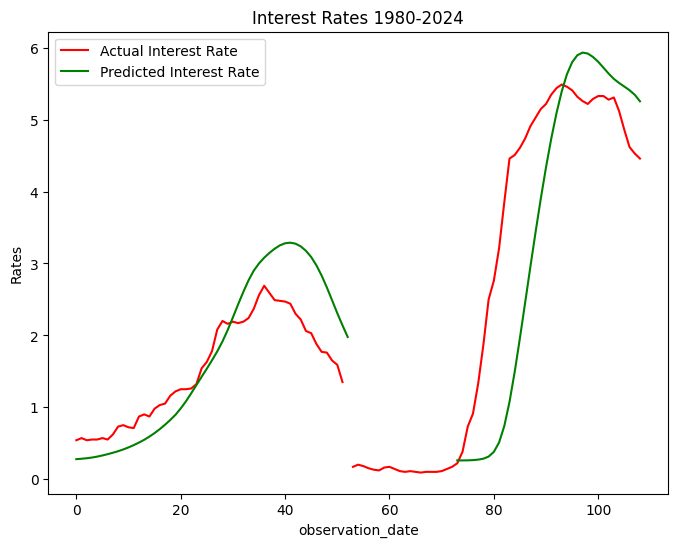

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(ir_test_processed, color='red', label='Actual Interest Rate')
plt.plot(y_pred, color='green', label='Predicted Interest Rate')

plt.title('Interest Rates 1980-2024')
plt.xlabel('observation_date')
plt.ylabel('Rates')

plt.legend()
plt.show()

Analysis

